# Tabacco

The survey asked questions about different Tabacco products as shown in the list below. To help in the analysis, the data set is divided to extract the sub-classes data. 

* Cigarettes
* Snuff
* Chewing Tabacco
* Smokeless Tabacco
* Cigar
* Pipe 

In [2]:
#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [3]:
#data is a tsv file therefore read it as a csv file with \t as the seperator
dataset = pd.read_csv('data/drugs-dataset.tsv', delimiter = '\t')

In [4]:
case_quest_data = dataset.ix[:,0:2].copy()
tabacco = dataset.ix[:,'CIGEVER':'PIPE30DY'].copy() # tabacco dataset

In [5]:
tabacco_cig = tabacco.ix[:,'CIGEVER':'CIG100LF'].copy() # cigarettes dataset
tabacco_snuff = tabacco.ix[:,'SNFEVER':'SNF30BR2'].copy() # snuff dataset
tabacco_chew = tabacco.ix[:,'CHEWEVER':'CHW30BR2'].copy() # chew dataset
tabacco_smokeless = tabacco.ix[:,'SLTTRY':'SLT30BR2'].copy() # smokeless dataset
tabacco_cigar = tabacco.ix[:,'CIGAREVR':'CGR30BR2'].copy() # cigar dataset
tabacco_pipe = tabacco.ix[:,'PIPEVER':'PIPE30DY'].copy() # pipe dataset

## Cigarettes

As can be seen below, almost half of the cases have never smoken cigarettes while the other half smoked cigrates.

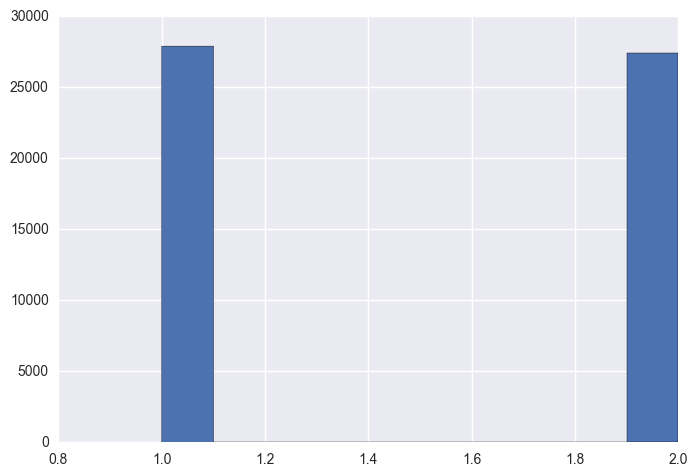

In [14]:
tabacco_cig['CIGEVER'].hist()

All data that is 'LEGITIMATE SKIP' or 'BAD DATA' or 'BLANK' 
#(tabacco['CIGEVER'] == 1) & (tabacco['CIGYFU'] != 9999) & (tabacco['CIGYFU'] != 9985) & (tabacco['CIGYFU'] != 9989)

## Next

[Alcohol](Alcohol.ipynb)